In [2]:
import pandas as pd

The first thing we need to do is import our data and merge the police and fire stations features into our current dataset

In [3]:
grid_node_data = pd.read_csv('../data/grid_node_data.csv', sep=',', encoding='latin-1', index_col=0)
police_station_data = pd.read_csv('../data/police-station.csv', sep=',', encoding='latin-1', index_col=0)
fire_station_data = pd.read_csv('../data/fire-station.csv', sep=',', encoding='latin-1', index_col=0)

zone_police_data = pd.merge(grid_node_data, police_station_data, how='left', on=['x', 'y'])
zone_df = pd.merge(zone_police_data, fire_station_data, how='left', on=['x', 'y'])

X = zone_df[['time_of_day',
             'month_of_year',
             'x', 'y',
             'number of police station',
             'number of fire station']]

y = pd.read_csv('../data/grid_target.csv', sep=',', encoding='latin-1')

In [4]:
# X = pd.concat([X]*3, ignore_index=True)
# y = pd.concat([y]*3, ignore_index=True)
y = y[['target']]['target']

# Data Observation

In [5]:
frames = [X, y] 
df = pd.concat(frames, axis=1)
df

,time_of_day,month_of_year,x,y,number of police station,number of fire station,target
0,3,1,8,40,0,0,0.000000
1,2,8,36,141,0,0,0.000000
2,2,8,13,176,0,0,0.000615
3,1,1,31,189,0,0,0.000000
4,2,9,20,46,0,0,0.000000
...,...,...,...,...,...,...,...
214052,3,2,33,65,0,0,0.000000
214053,3,1,66,153,0,0,0.000000
214054,3,5,86,168,0,0,0.000476
214055,1,6,87,223,0,0,0.000772


From a first sight at our data, we can see that we have categorical data (`time_of_day` and `month`) as well as numerical data (`x` and `y`) and boolean (`number of police station` and `number of fire station`).

Furthermore, we can see that we have quite a lot of targets at zero, let's observe that a bit later.

For now, let's observe the correlation between our different features and our target. Let's start with our numerical data.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0.92, 'Crime rate based on the zone')

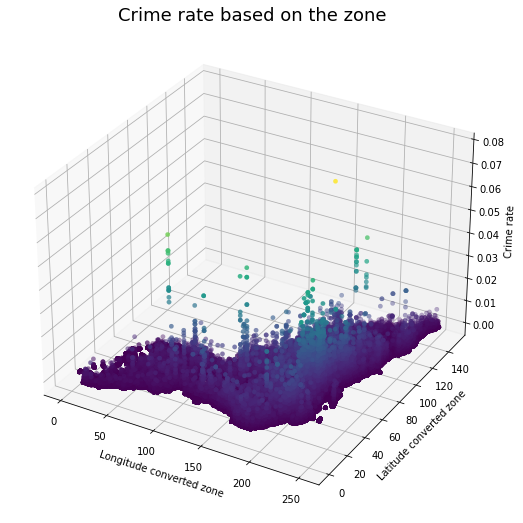

In [7]:
fig = plt.figure(figsize=(9, 9))
ax = plt.axes(projection='3d')
ax.scatter(df['y'], df['x'], df['target'], c=df['target'], cmap='viridis', linewidth=0.2)
ax.set_xlabel('Longitude converted zone')
ax.set_ylabel('Latitude converted zone')
ax.set_zlabel('Crime rate')
ax.set_title('Crime rate based on the zone', fontsize=18)

From the previous graph, we can observe that there is a pretty high correlation between the probability of a crime happening and the spatial distribution on the city of montreal. 

Let's now observe the categorical features.

In [8]:
df['crime or not'] = df['target'] != 0
df

,time_of_day,month_of_year,x,y,number of police station,number of fire station,target,crime or not
0,3,1,8,40,0,0,0.000000,False
1,2,8,36,141,0,0,0.000000,False
2,2,8,13,176,0,0,0.000615,True
3,1,1,31,189,0,0,0.000000,False
4,2,9,20,46,0,0,0.000000,False
...,...,...,...,...,...,...,...,...
214052,3,2,33,65,0,0,0.000000,False
214053,3,1,66,153,0,0,0.000000,False
214054,3,5,86,168,0,0,0.000476,True
214055,1,6,87,223,0,0,0.000772,True


Text(0.5, 1.0, 'Relation between target and time of day')

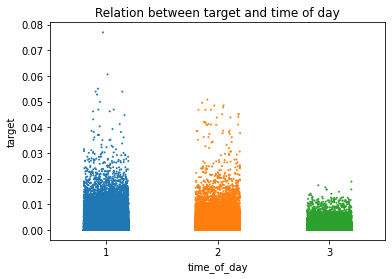

In [9]:
import seaborn as sns
sns.stripplot(data =df, x="time_of_day", y="target", jitter=0.2, size=2)
plt.title('Relation between target and time of day')

Text(0.5, 1.0, 'Relation between target and month of year')

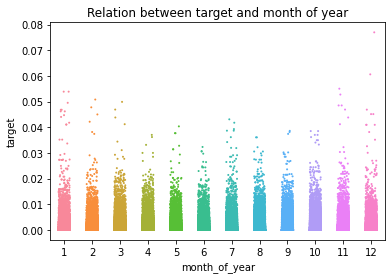

In [10]:
sns.stripplot(data =df, x="month_of_year", y="target", jitter=0.2, size=2)
plt.title('Relation between target and month of year')

In [11]:
group_df = df.groupby(['time_of_day','crime or not']).size().reset_index().rename(columns={0: 'Count'})
group_df

,time_of_day,crime or not,Count
0,1,False,36947
1,1,True,34311
2,2,False,38262
3,2,True,32879
4,3,False,41556
5,3,True,30102


In [12]:
label = ['No Crime at day', 'Crime at day',
         'No Crime at evening', 'Crime at evening',
         'No Crime at night', 'Crime at night',]

In [13]:
group_df['label'] = label

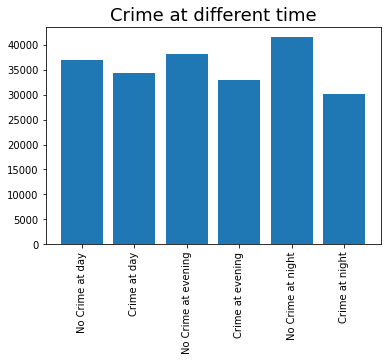

In [14]:
height = group_df['Count']
bars = group_df['time_of_day']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, group_df['label'])
plt.xticks(rotation=90)
plt.title('Crime at different time', fontsize=18)
# Show graphic
plt.show()

#### The number of crimes are almost the same, but the crime rate is higher in day and evening than night

In [15]:
group_df = df.groupby(['month_of_year','crime or not']).size().reset_index().rename(columns={0: 'Count'})
group_df

,month_of_year,crime or not,Count
0,1,False,9859
1,1,True,7914
2,2,False,10450
3,2,True,7478
4,3,False,9729
5,3,True,8120
6,4,False,9859
7,4,True,8189
8,5,False,9886
9,5,True,8061


In [16]:
label = ['No Crime at Jan', 'Crime at Jan',
         'No Crime at Feb', 'Crime at Feb',
         'No Crime at Mar', 'Crime at Mar',
         'No Crime at Apr', 'Crime at Apr',
         'No Crime at May', 'Crime at May',
         'No Crime at Jun', 'Crime at Jun',
         'No Crime at Jul', 'Crime at Jul',
         'No Crime at Aug', 'Crime at Aug',
         'No Crime at Sep', 'Crime at Sep',
         'No Crime at Oct', 'Crime at Oct',
         'No Crime at Nov', 'Crime at Nov',
         'No Crime at Dec', 'Crime at Dec']
group_df['label'] = label

In [17]:
group_df

,month_of_year,crime or not,Count,label
0,1,False,9859,No Crime at Jan
1,1,True,7914,Crime at Jan
2,2,False,10450,No Crime at Feb
3,2,True,7478,Crime at Feb
4,3,False,9729,No Crime at Mar
5,3,True,8120,Crime at Mar
6,4,False,9859,No Crime at Apr
7,4,True,8189,Crime at Apr
8,5,False,9886,No Crime at May
9,5,True,8061,Crime at May


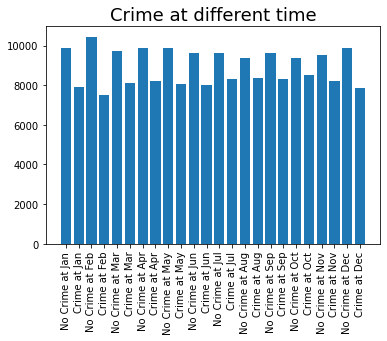

In [18]:
height = group_df['Count']
bars = group_df['month_of_year']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, group_df['label'])
plt.xticks(rotation=90)
plt.title('Crime at different time', fontsize=18)
# Show graphic
plt.show()

#### The number of crimes are almost the same, but we have more no-crimes than crimes

In [19]:
df.groupby(['number of police station', 'crime or not']).size()

number of police station  crime or not
0                         False           116576
                          True             96878
1                         False              189
                          True               414
dtype: int64

In [20]:
1242/567

2.1904761904761907

In [21]:
290634/349728

0.8310286851496019

In [22]:
(1242/567)/(290634/349728)

2.6358611075884353

The crime rate is 2.19 in the region with police stations, which is 2.6 times higher than the region without police station(0.83).
**Maybe we have more police stations in the regions with more crimes**

In [23]:
df.groupby(['number of fire station', 'crime or not']).size()

number of fire station  crime or not
0                       False           116328
                        True             96318
1                       False              437
                        True               974
dtype: int64

In [24]:
2922/1311

2.2288329519450802

In [25]:
288954/348984

0.8279863833298948

In [26]:
(2922/1311)/(288954/348984)

2.691871505158613

Similar results for the fire station. **Maybe we have more fire stations in the regions with more crimes**.

Let's now go back to the observation about the number of target at 0.

In [27]:
list(df['target']).count(0) / len(df)

0.5454855482418235

We observe here than more than half of our data results in a probability for a crime to happen to 0. We can then understand that our data is zero inflated and that a Neural Network will not behave correctly with zero-inflated data (as it is a complex set of sums with weights). 

To tackle this problem we decide to use a two step approach:

### Two step approach
    -Train a classifier C that tells us whether the regression output is zero, or not.
    -Train a neural network N on the part of the data with a non-zero target.

# Training

Let's start with the classifier. First, we decide to standardize our data. Making categorical data in the form of one hot encoding and standardizing numerical data. We don't really need to standardize the data for the classifier. Though it will be our input to our two step model once deployed.

## Classifier

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['time_of_day', 'month_of_year']
columns_to_scale  = ['x', 'y']

# Instantiate encoder/scaler
dt_scaler = MinMaxScaler() #StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
dt_scaler.fit(X[columns_to_scale]) 
ohe.fit(X[columns_to_encode])
scaled_columns  = dt_scaler.transform(X[columns_to_scale]) 
encoded_columns =       ohe.transform(X[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [29]:
X = processed_data

In [30]:
def split_data(X, y):
    sep1, sep2, sep3 = int(len(X)*0.7), int(len(X)*0.8), int(len(X))
    X_train, X_test, X_valid = X[:sep1], X[sep1:sep2], X[sep2:sep3]
    # change probability to be percentage
    y_train, y_test, y_valid = y[:sep1], y[sep1:sep2], y[sep2:sep3]
    return X_train, X_test, X_valid, y_train, y_test, y_valid

In [31]:
new_y = y!=0

In [32]:
y, new_y

(0         0.000000
 1         0.000000
 2         0.000615
 3         0.000000
 4         0.000000
             ...   
 214052    0.000000
 214053    0.000000
 214054    0.000476
 214055    0.000772
 214056    0.004040
 Name: target, Length: 214057, dtype: float64,
 0         False
 1         False
 2          True
 3         False
 4         False
           ...  
 214052    False
 214053    False
 214054     True
 214055     True
 214056     True
 Name: target, Length: 214057, dtype: bool)

In [33]:
X

array([[0.05333333, 0.15873016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24      , 0.55952381, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08666667, 0.6984127 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57333333, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58      , 0.88492063, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50666667, 0.87301587, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
len(X)

214057

In [35]:
X_train, X_test, X_valid, new_y_train, new_y_test, new_y_valid = split_data(X, new_y)
X_train

array([[0.05333333, 0.15873016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24      , 0.55952381, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08666667, 0.6984127 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43333333, 0.73412698, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15333333, 0.0952381 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28666667, 0.26190476, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, new_y, cv=10)

array([0.89624404, 0.88549939, 0.89451556, 0.89456227, 0.89484257,
       0.89306736, 0.89203962, 0.89011913, 0.890306  , 0.89549171])

In [37]:
clf.fit(X_train, new_y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
y_pred = clf.predict(X_test)
list(y_pred ^ new_y_test).count(0)/len(new_y_test)

0.869475847893114

### SVM

In [38]:
#from sklearn.svm import SVC
#classifier=SVC()

In [39]:
# classifier.fit(X_train, new_y_train)

In [40]:
# y_pred = classifier.predict(X_test)

In [41]:
# new_y_train

In [42]:
# list(y_pred ^ new_y_test).count(0)

In [43]:
# list(y_pred ^ new_y_test).count(0)/len(new_y_test)

0.658880687657666

**Decison tree works better on our data and it takes a few second to train the model**, while SVM takes a few hours to train and gives a lower accuracy.

## Neutral Network

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
def build_model(input_shape=X.shape[1:], n_hidden=2, n_neurons=20, learning_rate=3e-4):
    model = keras.models.Sequential()
    # input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    # hidden layer
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="sigmoid", kernel_initializer="he_normal"))
    # output layer
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error",
                  optimizer=optimizer)
    return model

First, we need to filter our input data with the decision made by our classifier and observe that the result is correct.

In [42]:
filt = clf.predict(X)
filt

array([False, False,  True, ...,  True, False,  True])

In [43]:
df['decision tree prediction'] = filt

In [44]:
df

,time_of_day,month_of_year,x,y,number of police station,number of fire station,target,crime or not,decision tree prediction
0,3,1,8,40,0,0,0.000000,False,False
1,2,8,36,141,0,0,0.000000,False,False
2,2,8,13,176,0,0,0.000615,True,True
3,1,1,31,189,0,0,0.000000,False,False
4,2,9,20,46,0,0,0.000000,False,False
...,...,...,...,...,...,...,...,...,...
214052,3,2,33,65,0,0,0.000000,False,False
214053,3,1,66,153,0,0,0.000000,False,False
214054,3,5,86,168,0,0,0.000476,True,True
214055,1,6,87,223,0,0,0.000772,True,False


In [45]:
crime_df = df[df['decision tree prediction'] == True]
no_crime_df = df[df['decision tree prediction'] == False]
crime_df

,time_of_day,month_of_year,x,y,number of police station,number of fire station,target,crime or not,decision tree prediction
2,2,8,13,176,0,0,0.000615,True,True
7,2,8,17,185,0,0,0.000547,True,True
8,2,12,50,154,0,0,0.005968,True,True
10,1,10,0,14,0,0,0.001407,True,True
11,2,11,59,136,0,0,0.005788,True,True
...,...,...,...,...,...,...,...,...,...
214044,1,11,44,204,0,0,0.001641,True,True
214045,3,10,15,182,0,0,0.000000,False,True
214050,3,1,72,206,0,0,0.001362,True,True
214054,3,5,86,168,0,0,0.000476,True,True


In [46]:
len(no_crime_df[no_crime_df['target'] != 0])/len(no_crime_df), no_crime_df[no_crime_df['target'] != 0]['target'].describe()

(0.034963056931753896,
 count    4079.000000
 mean        0.001635
 std         0.001780
 min         0.000075
 25%         0.000668
 50%         0.001094
 75%         0.001966
 max         0.024576
 Name: target, dtype: float64)

In [47]:
len(crime_df[crime_df['target'] == 0])/len(crime_df) 

0.042899241202985904

We observed here that for both our data without crimes and with crimes, the amount of false positive or false negative from our classifier is really low. Indeed, only 4% of our data ends up being false positive, and only 3% are false negative. Furthermore, the probability of a crime happening in the region labelled as false negative is still pretty low so we are not really putting our users in danger with our classifier.

Let's continue and remove the unwanted columns of our input and normalize the input.

In [48]:
crime_df.columns[:6]

Index(['time_of_day', 'month_of_year', 'x', 'y', 'number of police station',
       'number of fire station'],
      dtype='object')

In [49]:
crime_X = crime_df[crime_df.columns[:6]]
crime_X

,time_of_day,month_of_year,x,y,number of police station,number of fire station
2,2,8,13,176,0,0
7,2,8,17,185,0,0
8,2,12,50,154,0,0
10,1,10,0,14,0,0
11,2,11,59,136,0,0
...,...,...,...,...,...,...
214044,1,11,44,204,0,0
214045,3,10,15,182,0,0
214050,3,1,72,206,0,0
214054,3,5,86,168,0,0


In [50]:
# Scale and Encode Separate Columns

nn_scaler = MinMaxScaler()
nn_scaler.fit(crime_X[columns_to_scale]) 
scaled_columns  = nn_scaler.transform(crime_X[columns_to_scale]) 
encoded_columns =    ohe.transform(crime_X[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_crime_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
processed_crime_data

array([[0.08724832, 0.69387755, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11409396, 0.73061224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33557047, 0.60408163, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.48322148, 0.81632653, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57718121, 0.66122449, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51006711, 0.87346939, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
crime_X = processed_crime_data
crime_X

array([[0.08724832, 0.69387755, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11409396, 0.73061224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33557047, 0.60408163, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.48322148, 0.81632653, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57718121, 0.66122449, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51006711, 0.87346939, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
crime_X.shape

(97391, 17)

In [57]:
crime_y = crime_df['target']
crime_y

2         0.000615
7         0.000547
8         0.005968
10        0.001407
11        0.005788
            ...   
214044    0.001641
214045    0.000000
214050    0.001362
214054    0.000476
214056    0.004040
Name: target, Length: 97391, dtype: float64

In [58]:
X_crime_train, X_crime_test, X_crime_valid, y_crime_train, y_crime_test, y_crime_valid = split_data(crime_X, crime_y)

In [59]:
len(X_crime_train), len(y_crime_train)

(68173, 68173)

In [60]:
keras_reg = build_model(input_shape=X_crime_train.shape[1:])
keras_reg.fit(X_crime_train, y_crime_train, epochs=300, validation_data=(X_crime_valid, y_crime_valid),
               callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/300
2131/2131 [==============================] - 2s 797us/step - loss: 0.0016 - val_loss: 7.6386e-04
Epoch 2/300
2131/2131 [==============================] - 2s 759us/step - loss: 7.5074e-04 - val_loss: 7.5654e-04
Epoch 3/300
2131/2131 [==============================] - 2s 756us/step - loss: 7.4341e-04 - val_loss: 7.4904e-04
Epoch 4/300
2131/2131 [==============================] - 2s 738us/step - loss: 7.3619e-04 - val_loss: 7.4181e-04
Epoch 5/300
2131/2131 [==============================] - 2s 733us/step - loss: 7.2905e-04 - val_loss: 7.3475e-04
Epoch 6/300
2131/2131 [==============================] - 2s 770us/step - loss: 7.2202e-04 - val_loss: 7.2770e-04
Epoch 7/300
2131/2131 [==============================] - 2s 759us/step - loss: 7.1510e-04 - val_loss: 7.2072e-04
Epoch 8/300
2131/2131 [==============================] - 2s 755us/step - loss: 7.0826e-04 - val_loss: 7.1385e-04
Epoch 9/300
2131/2131 [==============================] - 2s 731us/step - loss: 7.0153e-04 - val_loss

Epoch 73/300
2131/2131 [==============================] - 2s 733us/step - loss: 4.0652e-04 - val_loss: 4.1072e-04
Epoch 74/300
2131/2131 [==============================] - 2s 734us/step - loss: 4.0338e-04 - val_loss: 4.0758e-04
Epoch 75/300
2131/2131 [==============================] - 2s 737us/step - loss: 4.0027e-04 - val_loss: 4.0459e-04
Epoch 76/300
2131/2131 [==============================] - 2s 732us/step - loss: 3.9724e-04 - val_loss: 4.0143e-04
Epoch 77/300
2131/2131 [==============================] - 2s 729us/step - loss: 3.9418e-04 - val_loss: 3.9837e-04
Epoch 78/300
2131/2131 [==============================] - 2s 738us/step - loss: 3.9119e-04 - val_loss: 3.9532e-04
Epoch 79/300
2131/2131 [==============================] - 2s 728us/step - loss: 3.8821e-04 - val_loss: 3.9229e-04
Epoch 80/300
2131/2131 [==============================] - 2s 735us/step - loss: 3.8526e-04 - val_loss: 3.8933e-04
Epoch 81/300
2131/2131 [==============================] - 2s 738us/step - loss: 3.8236e-

2131/2131 [==============================] - 2s 743us/step - loss: 1.5726e-04 - val_loss: 1.5942e-04
Epoch 216/300
2131/2131 [==============================] - 2s 736us/step - loss: 1.5634e-04 - val_loss: 1.5847e-04
Epoch 217/300
2131/2131 [==============================] - 2s 739us/step - loss: 1.5543e-04 - val_loss: 1.5756e-04
Epoch 218/300
2131/2131 [==============================] - 2s 737us/step - loss: 1.5453e-04 - val_loss: 1.5666e-04
Epoch 219/300
2131/2131 [==============================] - 2s 745us/step - loss: 1.5362e-04 - val_loss: 1.5584e-04
Epoch 220/300
2131/2131 [==============================] - 2s 737us/step - loss: 1.5274e-04 - val_loss: 1.5488e-04
Epoch 221/300
2131/2131 [==============================] - 2s 751us/step - loss: 1.5185e-04 - val_loss: 1.5393e-04
Epoch 222/300
2131/2131 [==============================] - 2s 733us/step - loss: 1.5098e-04 - val_loss: 1.5308e-04
Epoch 223/300
2131/2131 [==============================] - 2s 737us/step - loss: 1.5010e-04 - 

In [61]:
keras_reg.save("neural_network_for_crime_data.h5")
model = keras.models.load_model("neural_network_for_crime_data.h5")

In [62]:
y_pred = model.predict(X_crime_test)
compare_df = pd.DataFrame(list(zip(y_crime_test, y_pred)), columns=['Actual', 'Predicted'])
compare_df

305/305 [==============================] - 0s 500us/step


,Actual,Predicted
0,0.001931,[0.015799865]
1,0.001945,[0.023897551]
2,0.000000,[-0.00092737377]
3,0.000000,[-0.018245019]
4,0.000895,[0.0024952516]
...,...,...
9734,0.000000,[-0.011226028]
9735,0.001728,[0.0046170354]
9736,0.008336,[0.008559156]
9737,0.002830,[0.01446116]


In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(compare_df['Actual'], compare_df['Predicted'])

9.793176536808729e-05

#### Fine turning NN model

In [64]:
from scipy.stats import reciprocal
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
param_distribs ={
    "n_hidden": [5, 7],
    "n_neurons": np.arange(20, 25),
#     "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist()
}

In [66]:
k_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)

search_cv = GridSearchCV(k_model, param_distribs, cv=3, refit=True)
search_cv.fit(X_crime_train, y_crime_train, epochs=300, 
              validation_data=(X_crime_valid, y_crime_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/300


<ipython-input-66-3507903ae2ce>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  k_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)


1421/1421 [==============================] - 2s 943us/step - loss: 0.0739 - val_loss: 3.6282e-05
Epoch 2/300
1421/1421 [==============================] - 1s 882us/step - loss: 1.2633e-05 - val_loss: 1.0798e-05
Epoch 3/300
1421/1421 [==============================] - 1s 888us/step - loss: 9.8655e-06 - val_loss: 1.0810e-05
Epoch 4/300
1421/1421 [==============================] - 1s 894us/step - loss: 9.8640e-06 - val_loss: 1.0856e-05
Epoch 5/300
1421/1421 [==============================] - 1s 886us/step - loss: 9.8658e-06 - val_loss: 1.0818e-05
Epoch 6/300
1421/1421 [==============================] - 1s 884us/step - loss: 9.8652e-06 - val_loss: 1.0818e-05
Epoch 7/300
1421/1421 [==============================] - 1s 893us/step - loss: 9.8647e-06 - val_loss: 1.0836e-05
Epoch 8/300
1421/1421 [==============================] - 1s 878us/step - loss: 9.8649e-06 - val_loss: 1.0821e-05
Epoch 9/300
1421/1421 [==============================] - 1s 868us/step - loss: 9.8647e-06 - val_loss: 1.0828e-05

Epoch 11/300
1421/1421 [==============================] - 1s 890us/step - loss: 1.1688e-05 - val_loss: 1.2198e-05
Epoch 12/300
1421/1421 [==============================] - 1s 914us/step - loss: 1.1688e-05 - val_loss: 1.2190e-05
Epoch 13/300
1421/1421 [==============================] - 1s 890us/step - loss: 1.1688e-05 - val_loss: 1.2202e-05
Epoch 14/300
711/711 [==============================] - 0s 569us/step - loss: 1.1407e-05
Epoch 1/300
1421/1421 [==============================] - 2s 937us/step - loss: 0.0018 - val_loss: 1.0680e-05
Epoch 2/300
1421/1421 [==============================] - 1s 886us/step - loss: 9.4977e-06 - val_loss: 1.0239e-05
Epoch 3/300
1421/1421 [==============================] - 1s 883us/step - loss: 9.4767e-06 - val_loss: 1.0244e-05
Epoch 4/300
1421/1421 [==============================] - 1s 892us/step - loss: 9.4766e-06 - val_loss: 1.0222e-05
Epoch 5/300
1421/1421 [==============================] - 1s 883us/step - loss: 9.4766e-06 - val_loss: 1.0245e-05
Epoch 6/

1421/1421 [==============================] - 1s 885us/step - loss: 9.3741e-06 - val_loss: 9.9621e-06
Epoch 6/300
1421/1421 [==============================] - 1s 892us/step - loss: 9.3747e-06 - val_loss: 9.9465e-06
Epoch 7/300
1421/1421 [==============================] - 1s 891us/step - loss: 9.3743e-06 - val_loss: 9.9552e-06
Epoch 8/300
1421/1421 [==============================] - 1s 921us/step - loss: 9.3745e-06 - val_loss: 9.9530e-06
Epoch 9/300
1421/1421 [==============================] - 1s 945us/step - loss: 9.3747e-06 - val_loss: 9.9500e-06
Epoch 10/300
1421/1421 [==============================] - 1s 897us/step - loss: 9.3742e-06 - val_loss: 9.9297e-06
Epoch 11/300
1421/1421 [==============================] - 1s 888us/step - loss: 9.3747e-06 - val_loss: 9.9411e-06
Epoch 12/300
1421/1421 [==============================] - 1s 897us/step - loss: 9.3740e-06 - val_loss: 9.9349e-06
Epoch 13/300
1421/1421 [==============================] - 1s 893us/step - loss: 9.3739e-06 - val_loss: 9.

1421/1421 [==============================] - 1s 969us/step - loss: 8.9253e-06 - val_loss: 9.8710e-06
Epoch 10/300
1421/1421 [==============================] - 1s 967us/step - loss: 8.9247e-06 - val_loss: 9.8937e-06
Epoch 11/300
711/711 [==============================] - 0s 597us/step - loss: 9.6761e-06
Epoch 1/300
1421/1421 [==============================] - 2s 1ms/step - loss: 6.6224e-04 - val_loss: 9.8009e-06
Epoch 2/300
1421/1421 [==============================] - 1s 968us/step - loss: 9.2362e-06 - val_loss: 9.8646e-06
Epoch 3/300
1421/1421 [==============================] - 1s 976us/step - loss: 9.2352e-06 - val_loss: 9.8434e-06
Epoch 4/300
1421/1421 [==============================] - 1s 977us/step - loss: 9.2344e-06 - val_loss: 9.8633e-06
Epoch 5/300
1421/1421 [==============================] - 1s 971us/step - loss: 9.2354e-06 - val_loss: 9.8514e-06
Epoch 6/300
1421/1421 [==============================] - 1s 974us/step - loss: 9.2351e-06 - val_loss: 9.8483e-06
Epoch 7/300
1421/142

Epoch 16/300
1421/1421 [==============================] - 1s 935us/step - loss: 9.3447e-06 - val_loss: 9.9530e-06
Epoch 17/300
1421/1421 [==============================] - 1s 938us/step - loss: 9.3447e-06 - val_loss: 9.9566e-06
Epoch 18/300
1421/1421 [==============================] - 1s 958us/step - loss: 9.3447e-06 - val_loss: 9.9432e-06
Epoch 19/300
1421/1421 [==============================] - 1s 938us/step - loss: 9.3443e-06 - val_loss: 9.9336e-06
Epoch 20/300
1421/1421 [==============================] - 1s 940us/step - loss: 9.3444e-06 - val_loss: 9.9701e-06
Epoch 21/300
1421/1421 [==============================] - 1s 947us/step - loss: 9.3445e-06 - val_loss: 9.9428e-06
Epoch 22/300
1421/1421 [==============================] - 1s 938us/step - loss: 9.3446e-06 - val_loss: 9.9413e-06
Epoch 23/300
1421/1421 [==============================] - 1s 950us/step - loss: 9.3445e-06 - val_loss: 9.9532e-06
Epoch 24/300
1421/1421 [==============================] - 1s 958us/step - loss: 9.3445e-

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000019B5E23F3A0>,
             param_grid={'n_hidden': [5, 7],
                         'n_neurons': array([20, 21, 22, 23, 24])})

In [67]:
y_crime_pred = search_cv.predict(X_crime_test)
compare_df = pd.DataFrame(list(zip(y_crime_train, y_crime_pred)), columns=['Actual', 'Predicted'])
compare_df

305/305 [==============================] - 0s 536us/step


,Actual,Predicted
0,0.000615,0.002794
1,0.000547,0.002280
2,0.005968,0.002777
3,0.001407,0.002680
4,0.005788,0.002998
...,...,...
9734,0.001216,0.002105
9735,0.000946,0.002786
9736,0.000686,0.002824
9737,0.001050,0.002302


In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(compare_df['Actual'], compare_df['Predicted'])

9.558854731648627e-06

The neural network is now working really well!

## Saving both our model and the scalers

In [69]:
from joblib import Parallel, delayed
import joblib
 
 
# Save the model as a pickle in a file
joblib.dump(clf, 'decision_tree_model.pkl')
 
# Load the model from the file
decision_tree_from_joblib = joblib.load('decision_tree_model.pkl')
 
# Use the loaded model to make predictions
decision_tree_from_joblib.predict(X_test)

array([ True, False, False, ..., False, False,  True])

In [91]:
estimator = search_cv.best_estimator_
estimator.model.save('best_nn.h5')
best_nn  = keras.models.load_model('best_nn.h5')
best_nn.predict(X_crime_test)

305/305 [==============================] - 0s 553us/step


array([[0.00279377],
       [0.00228003],
       [0.00277732],
       ...,
       [0.00282368],
       [0.00230153],
       [0.00227953]], dtype=float32)

In [93]:
y_crime_pred

array([0.00279377, 0.00228003, 0.00277732, ..., 0.00282368, 0.00230153,
       0.00227953], dtype=float32)

In [53]:
joblib.dump(dt_scaler, 'DT_MinMaxScaler.pkl')
joblib.dump(nn_scaler, 'NN_MinMaxScaler.pkl')
joblib.dump(ohe, 'OneHotEncodingScaler.pkl')

['OneHotEncodingScaler.pkl']

In [96]:
joblib.load('MinMaxScaler.pkl')

MinMaxScaler()

In [97]:
joblib.load('OneHotEncodingScaler.pkl')

OneHotEncoder(sparse=False)